# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')

In [6]:
cyclists_dataset = pd.read_csv('../../data/cyclists_dataset_no_outliers.csv')
cyclists_dataset = cyclists_dataset.select_dtypes(include=['number'])
cyclists_dataset = cyclists_dataset.dropna().reset_index(drop=True)

cyclists_dataset.info()
columns_to_use = cyclists_dataset.columns

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cyclists_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_cyclist_cp  2769 non-null   float64
 1   mean_delta       2769 non-null   float64
 2   mean_position    2769 non-null   float64
 3   birth_year       2769 non-null   int64  
 4   weight           2769 non-null   float64
 5   height           2769 non-null   float64
 6   cyclist_bmi      2769 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 151.6 KB


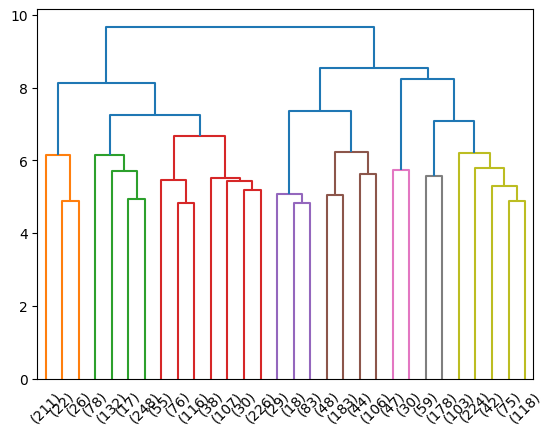

In [7]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [8]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.39658290974539756)

In [9]:
cluster_labels = fcluster(data_link, t=9, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.15244903094689138)

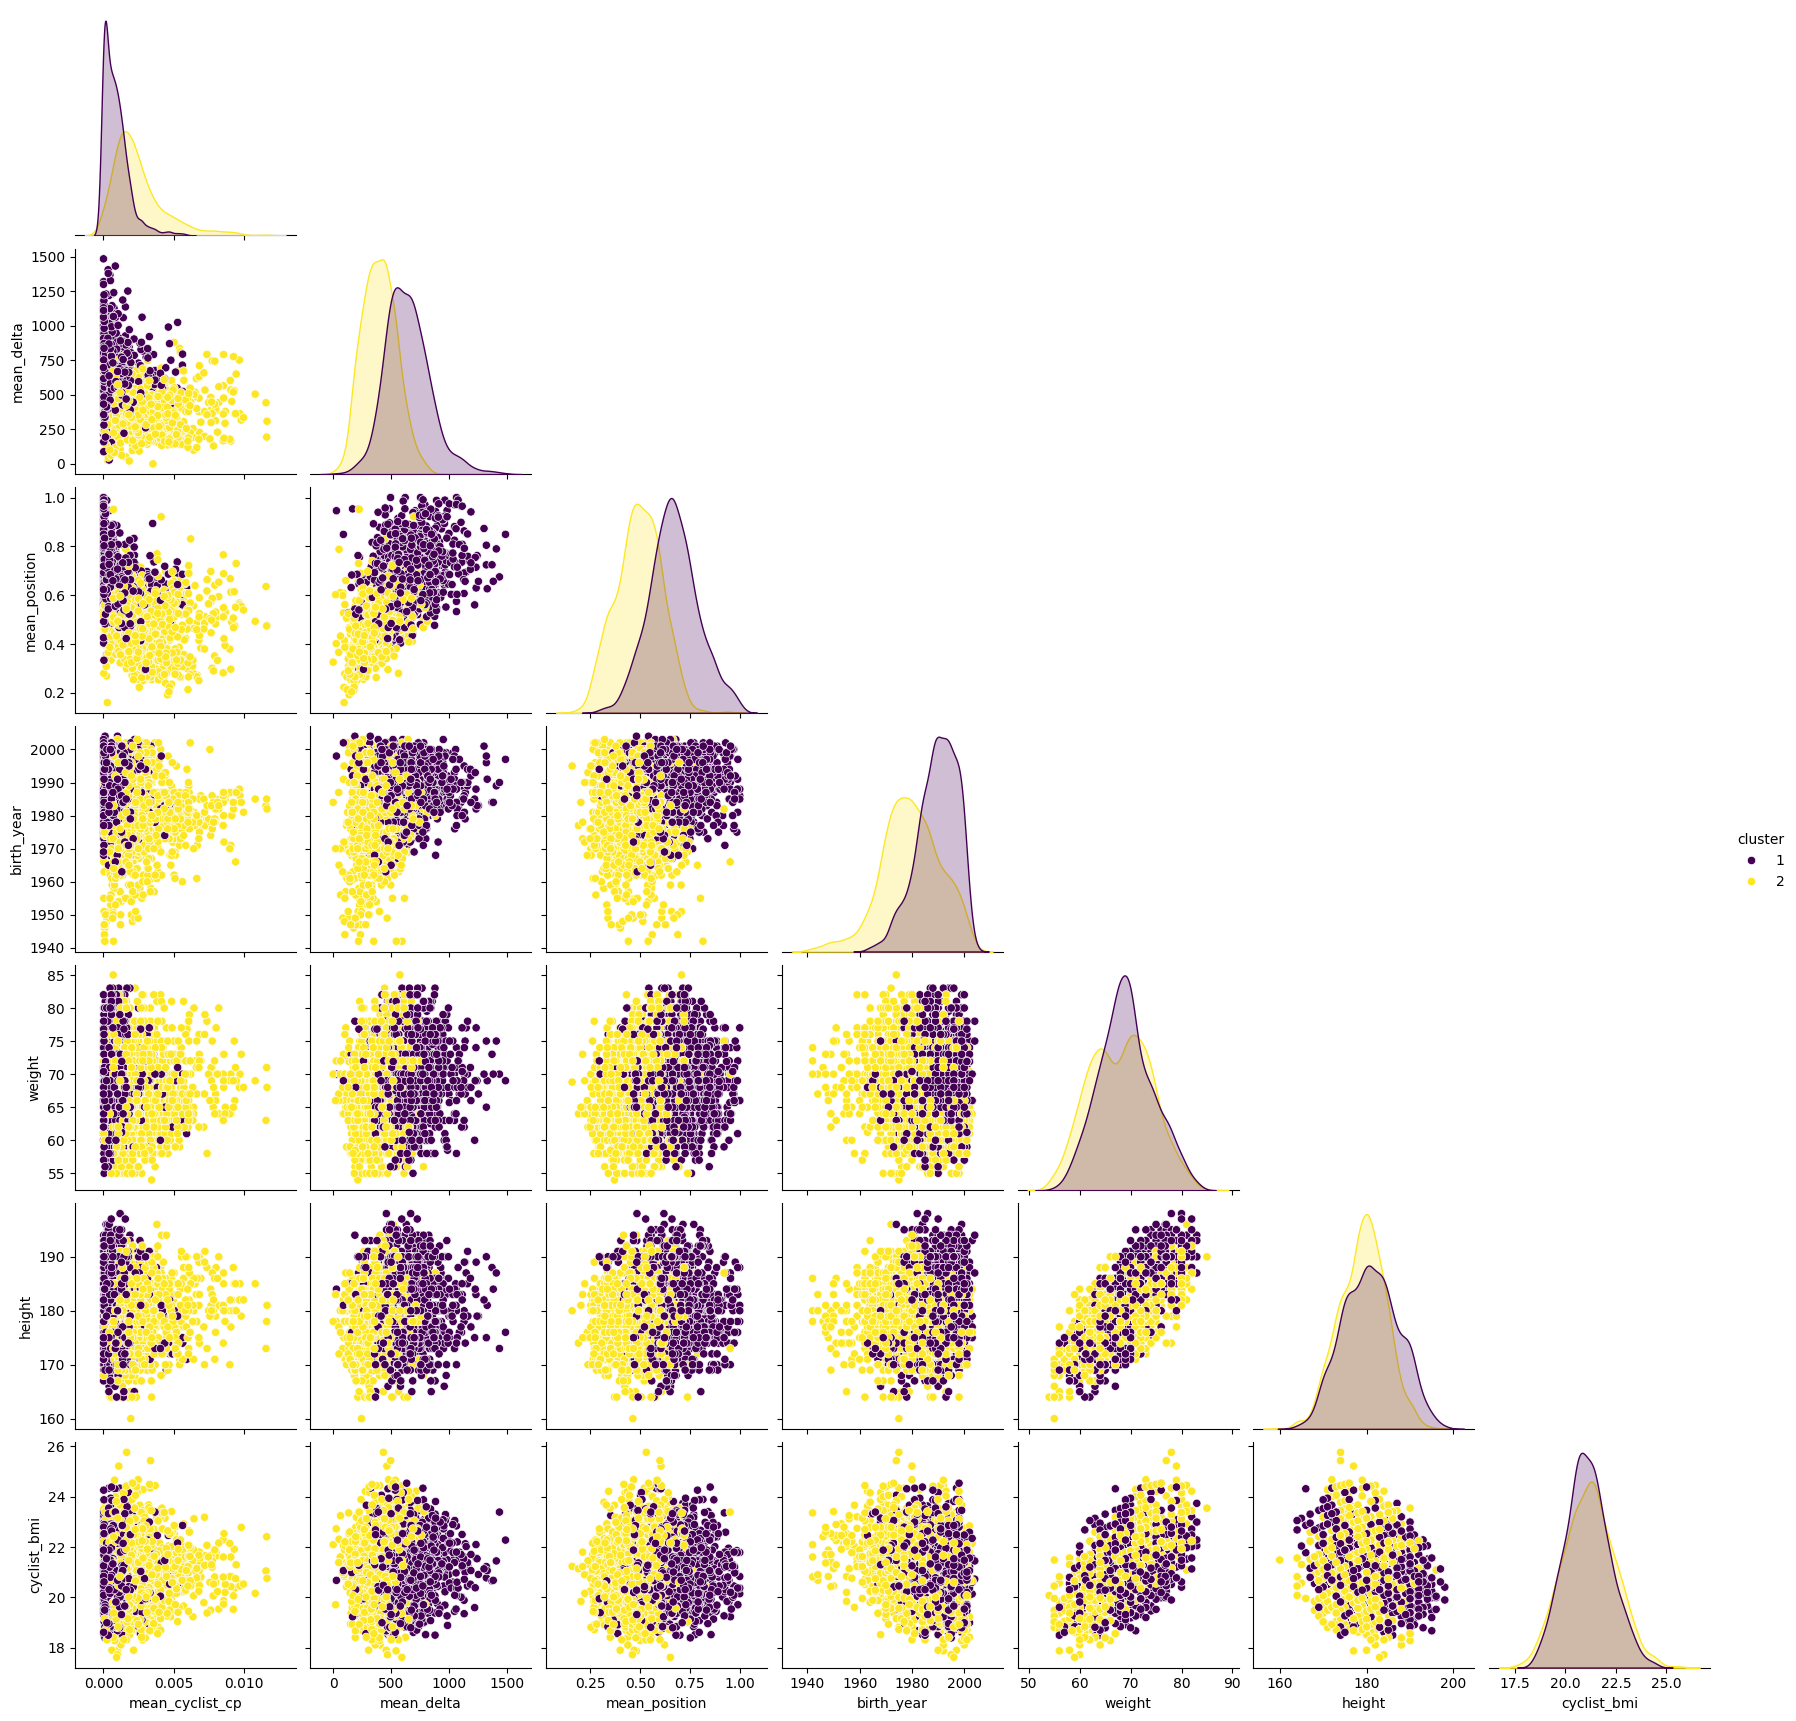

In [10]:
cyclists_dataset['cluster'] = cluster_labels
sns.pairplot(cyclists_dataset, hue='cluster', palette='viridis', corner=True)

In [11]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [12]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.4490039046459079)

In [14]:
cluster_labels = fcluster(data_link, t=2, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.2797142195429423)

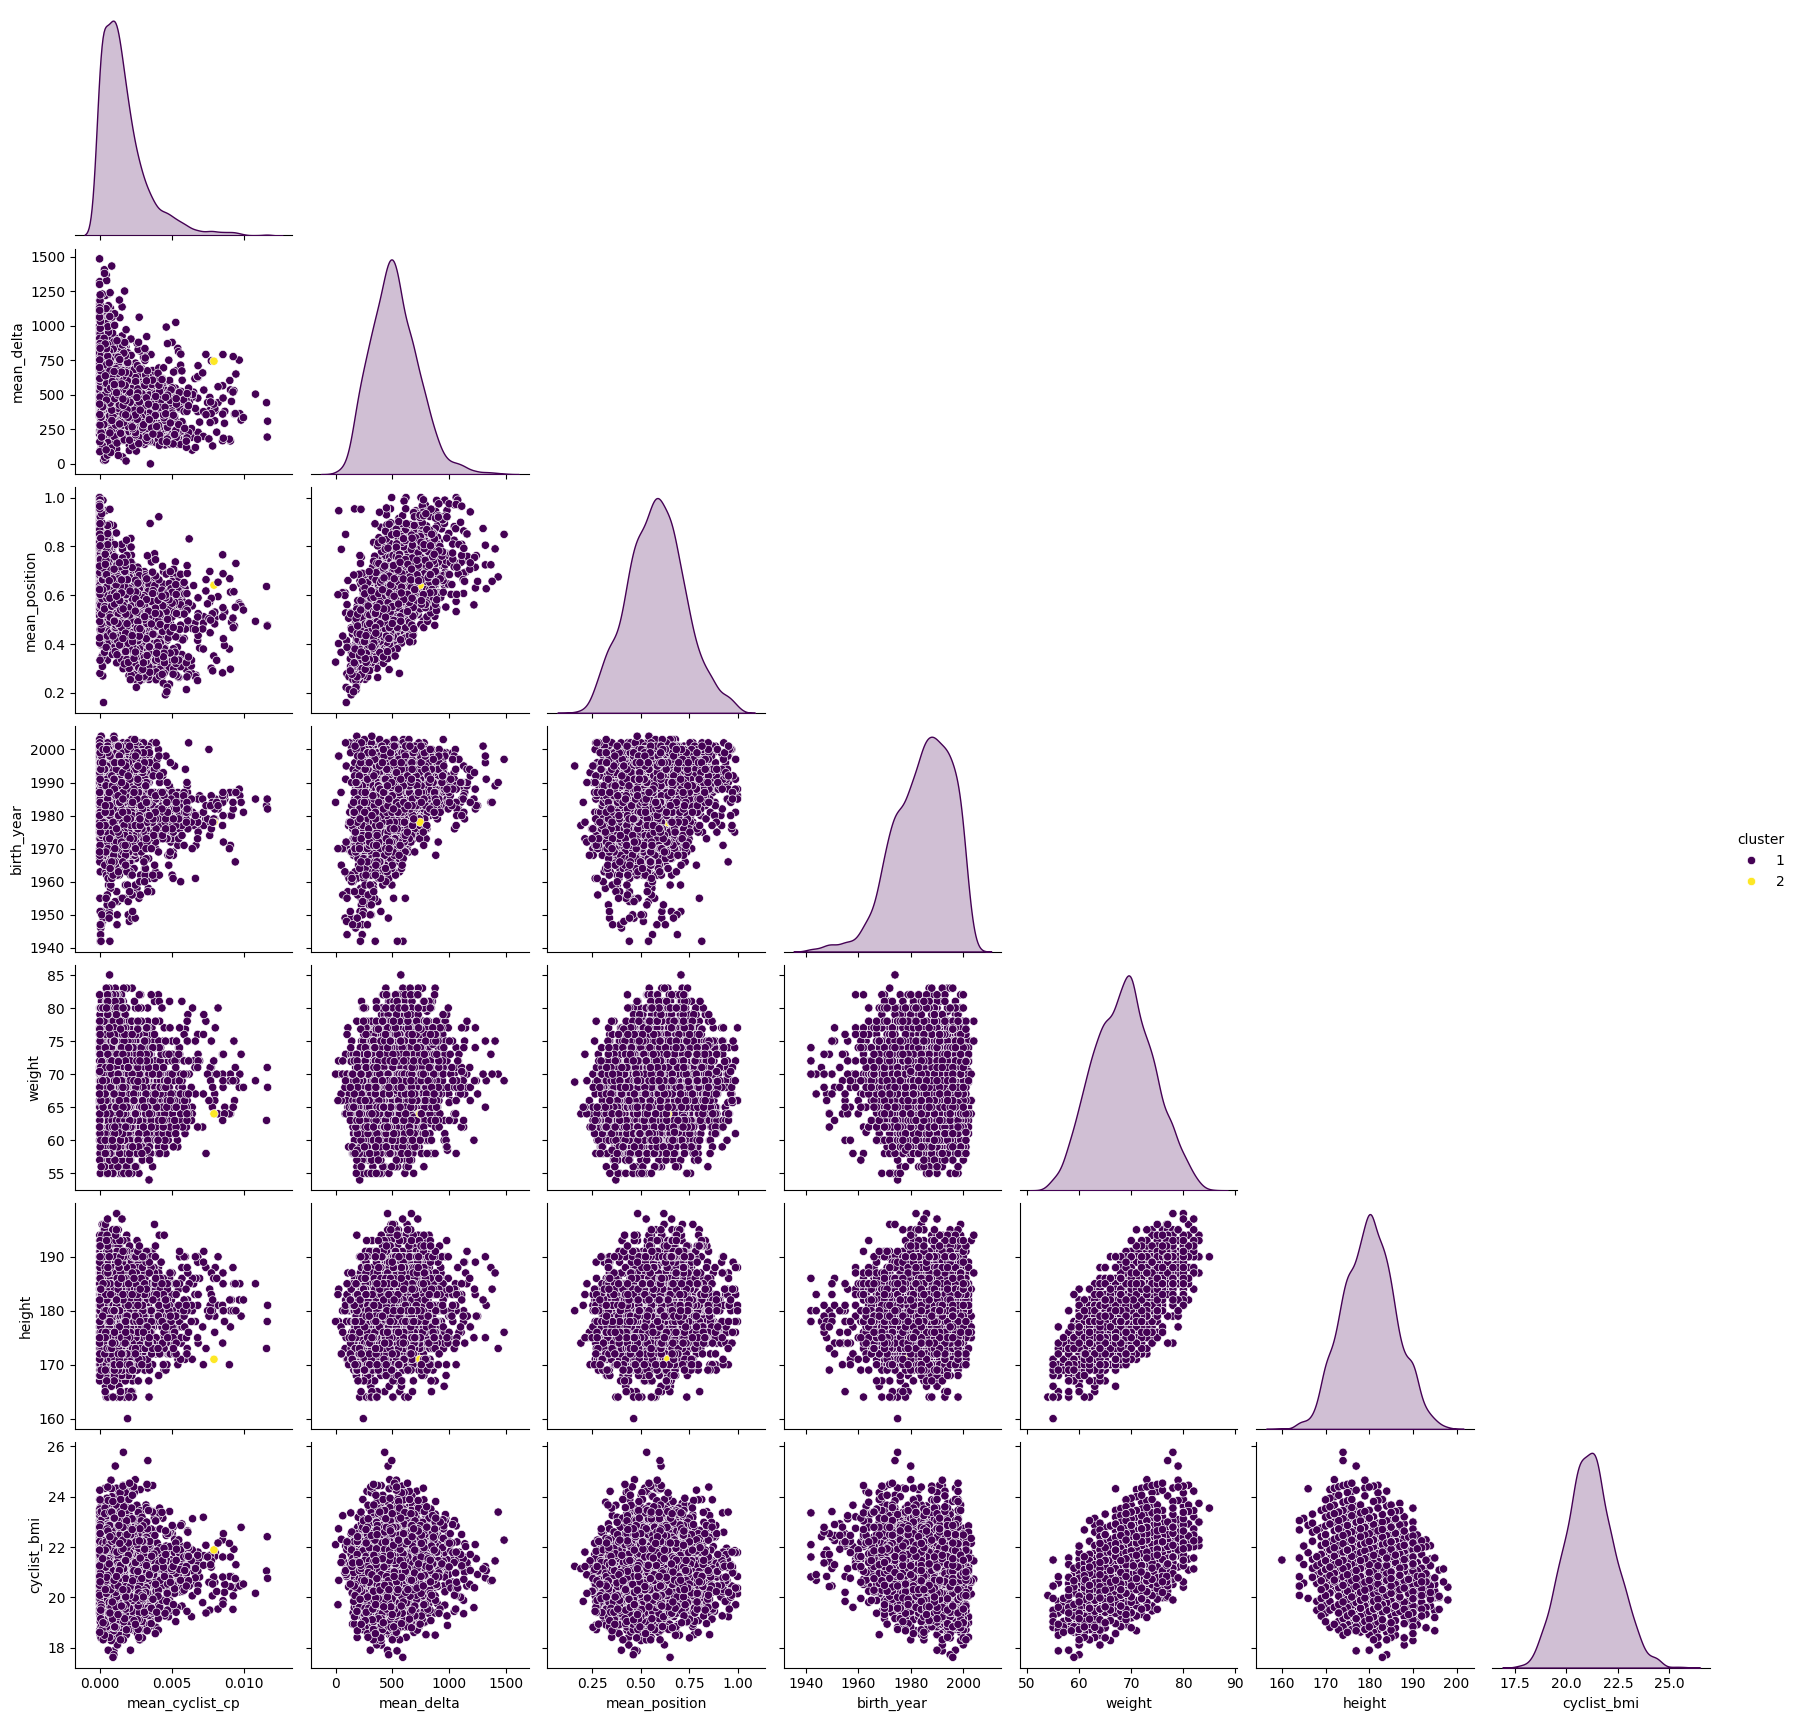

In [15]:
cyclists_dataset['cluster'] = cluster_labels
sns.pairplot(cyclists_dataset, hue='cluster', palette='viridis', corner=True)

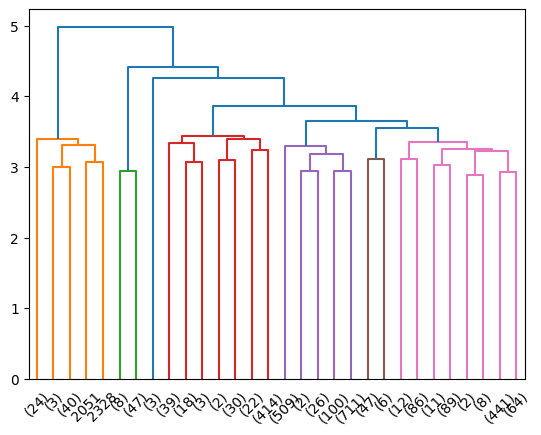

In [16]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [17]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.5255962725446002)

In [19]:
cluster_labels = fcluster(data_link, t=4, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.09521320904055461)

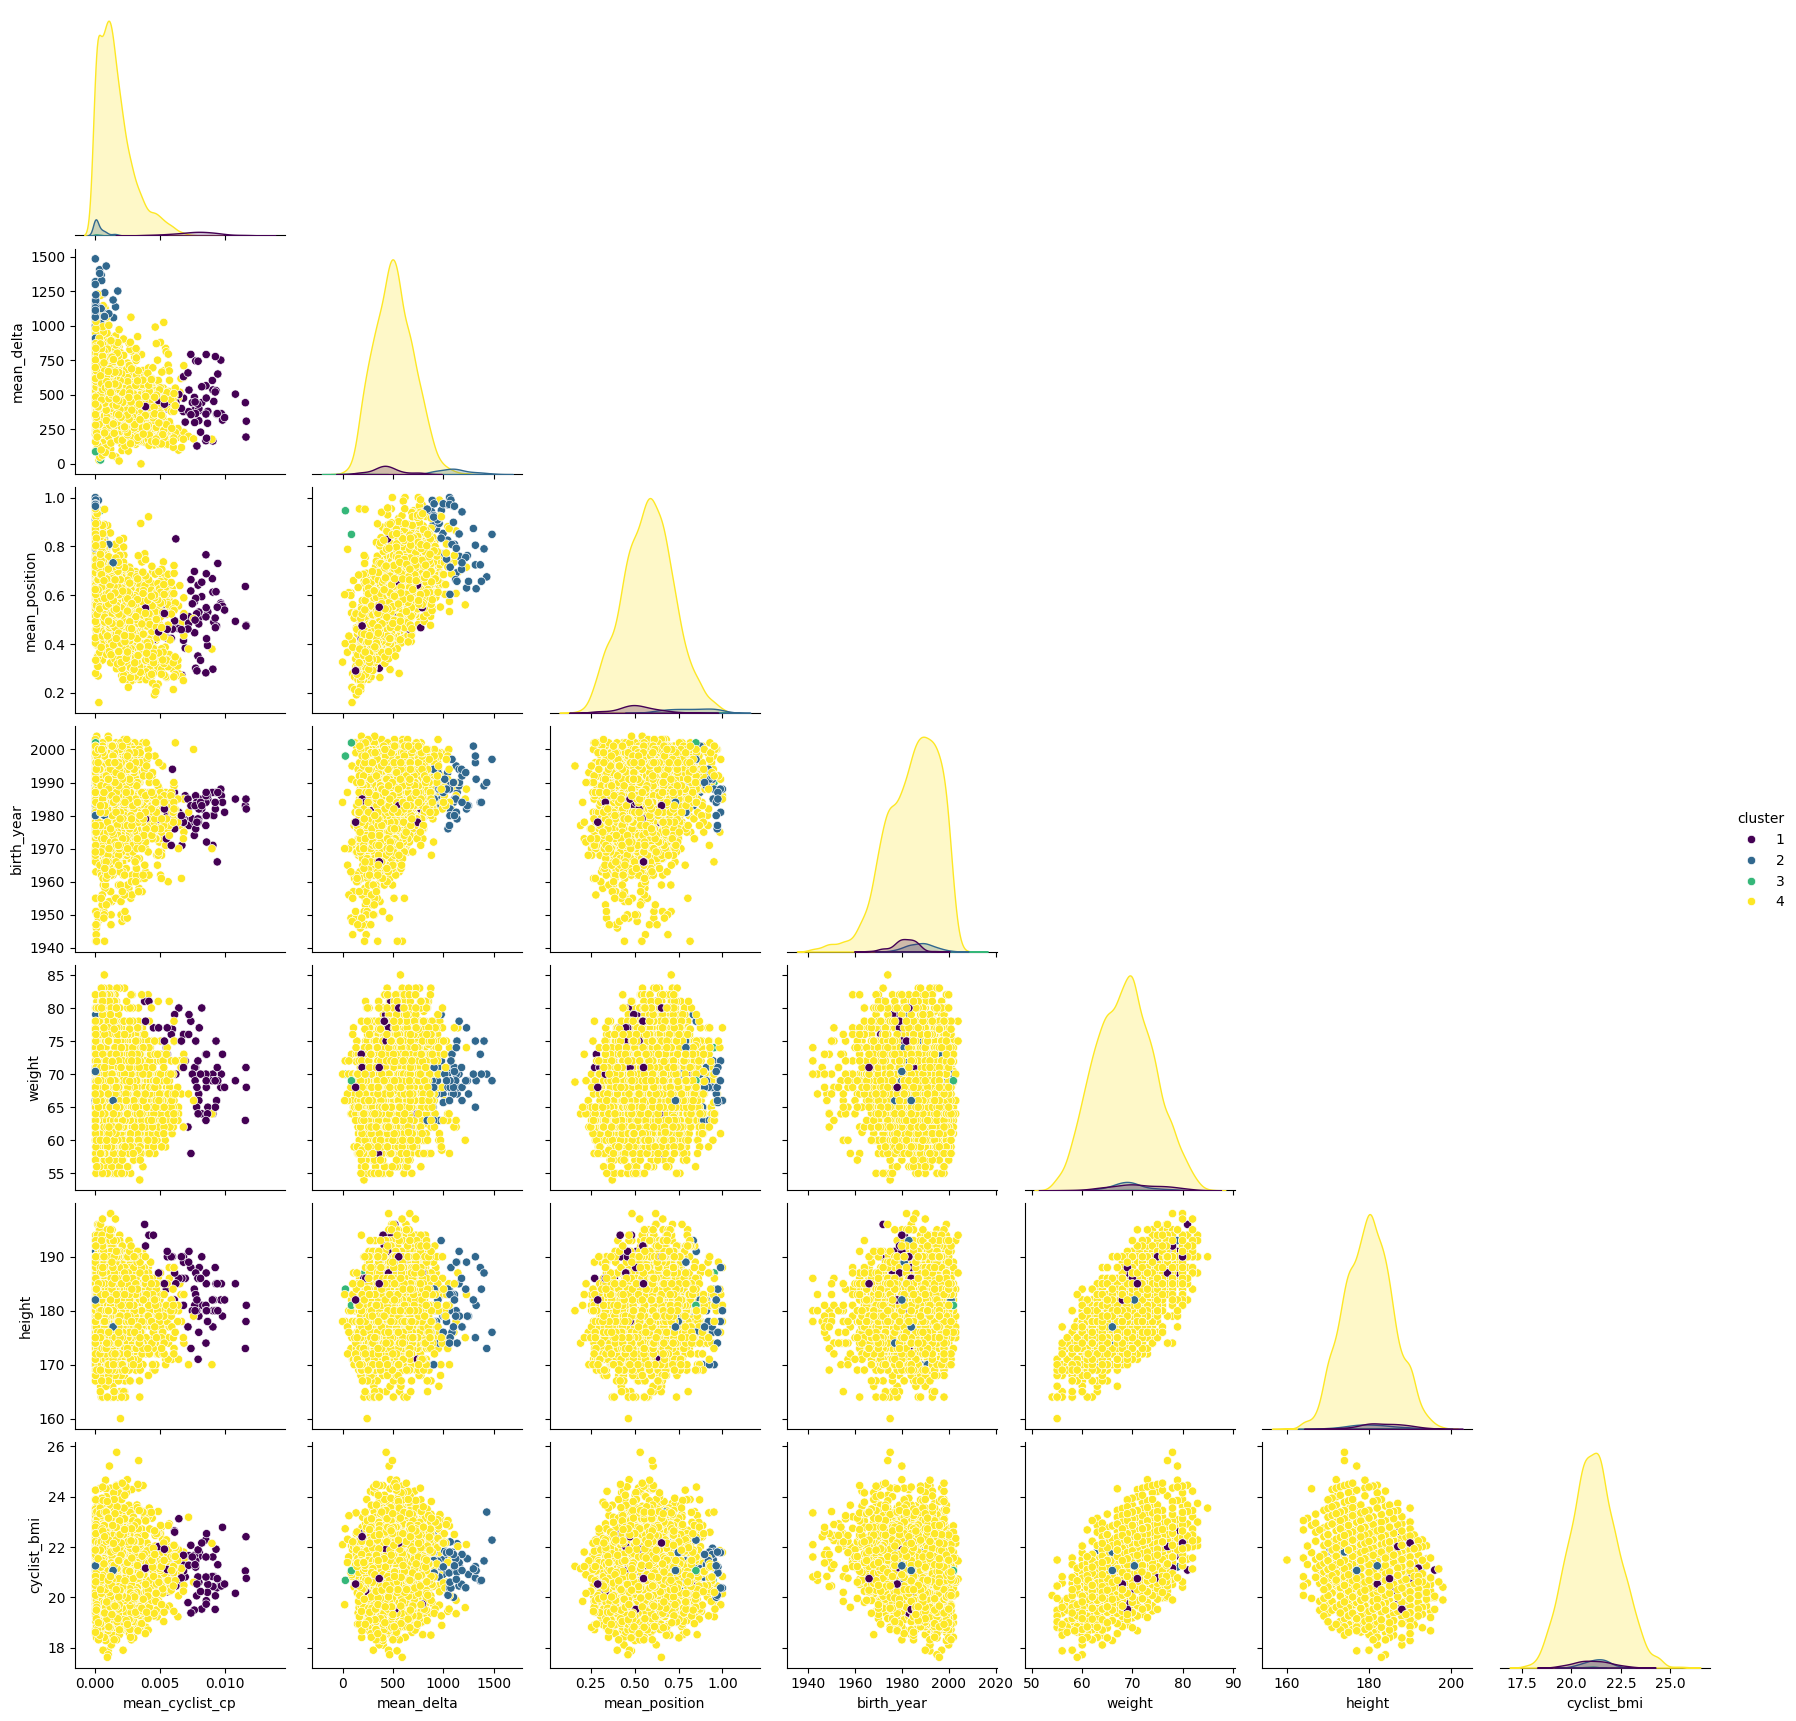

In [20]:
cyclists_dataset['cluster'] = cluster_labels
sns.pairplot(cyclists_dataset, hue='cluster', palette='viridis', corner=True)

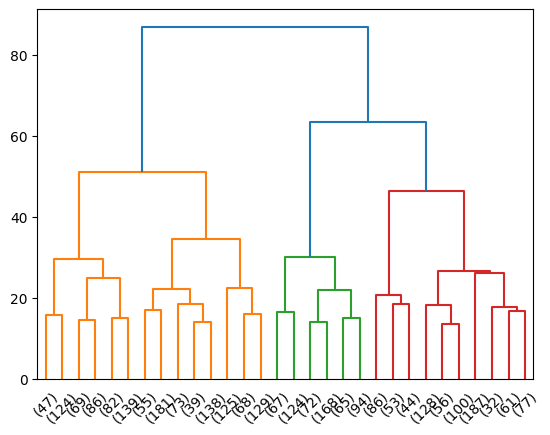

In [21]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [22]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.41469068284427507)

In [23]:
cluster_labels = fcluster(data_link, t=55, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.16506316695487377)

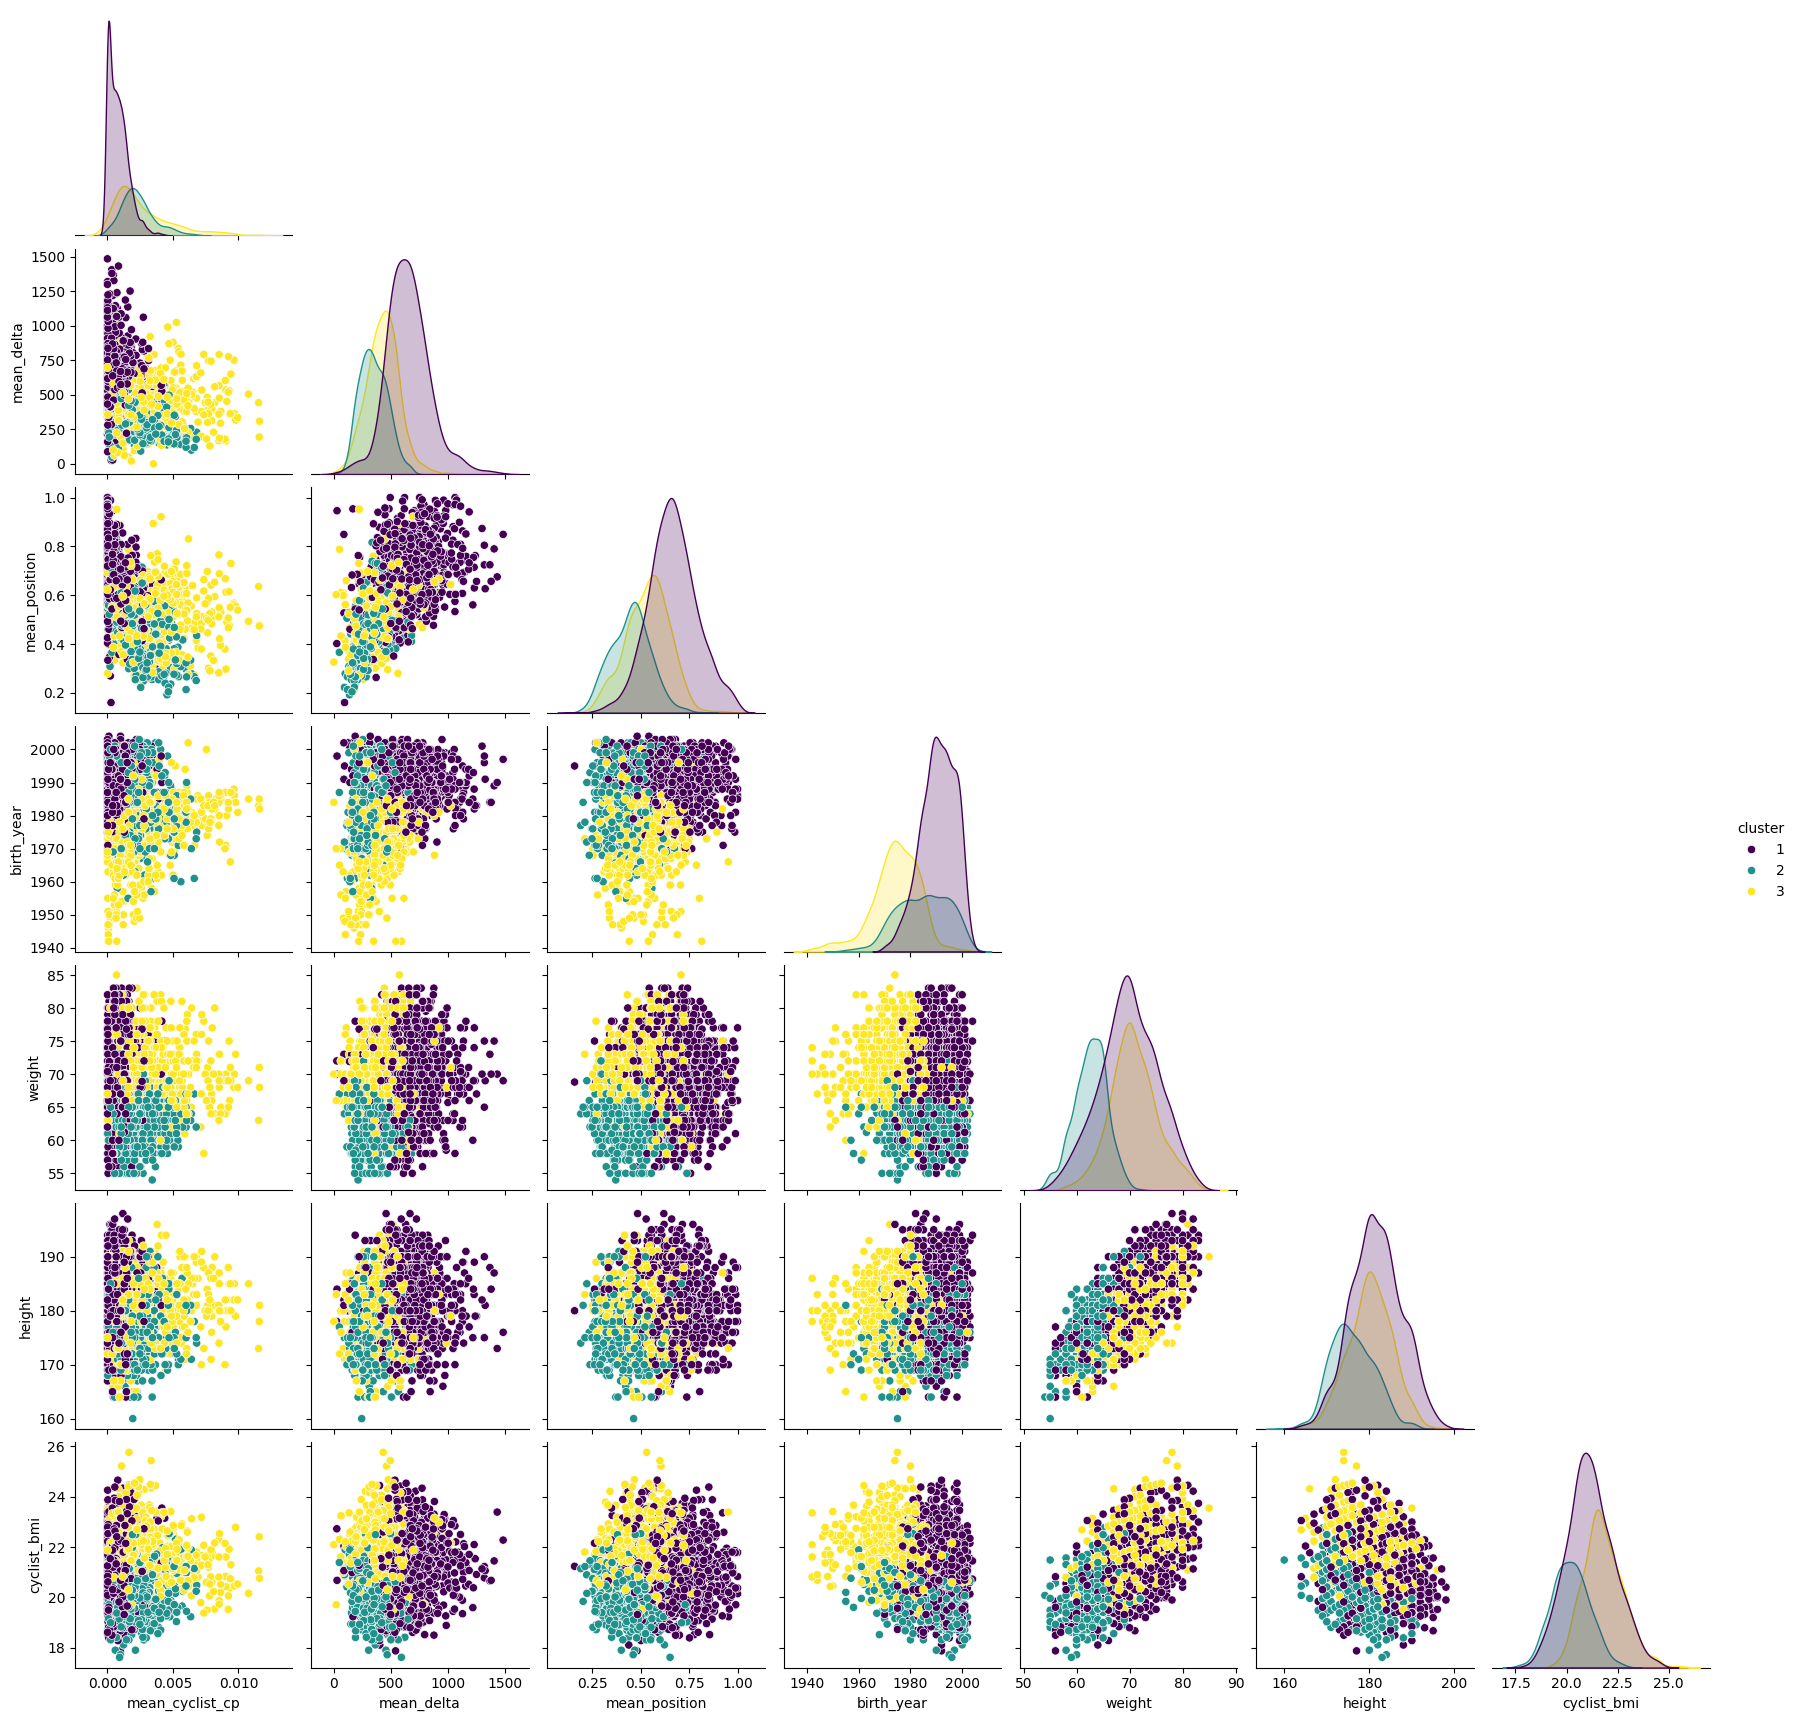

In [24]:
cyclists_dataset['cluster'] = cluster_labels
sns.pairplot(cyclists_dataset, hue='cluster', palette='viridis', corner=True)